In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import polars as pl
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
flights = sns.load_dataset("flights")
flights.head()

year,month,passengers
i64,cat,i64
1949,"""Jan""",112
1949,"""Feb""",118
1949,"""Mar""",132
1949,"""Apr""",129
1949,"""May""",121


<Axes: xlabel='year', ylabel='passengers'>

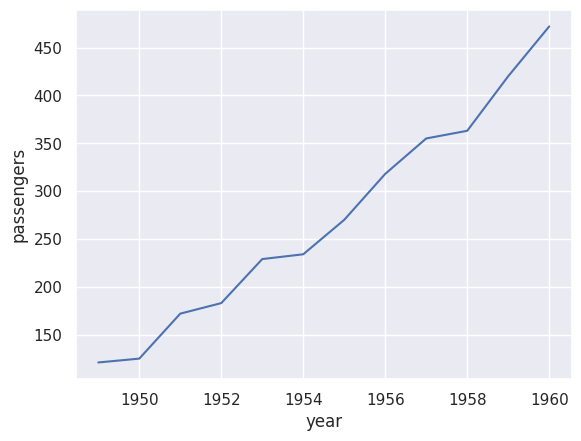

In [3]:
may_flights = flights.filter(pl.col("month") == 'May')
sns.lineplot(data=may_flights, x="year", y="passengers")

In [4]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

/tmp/ipykernel_5537/2807766033.py:1: DeprecationWarning: In a future version of polars, the default `aggregate_function` will change from `'first'` to `None`. Please pass `'first'` to keep the current behaviour, or `None` to accept the new one.
  flights_wide = flights.pivot(index="year", columns="month", values="passengers")


year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


<Axes: ylabel='May'>

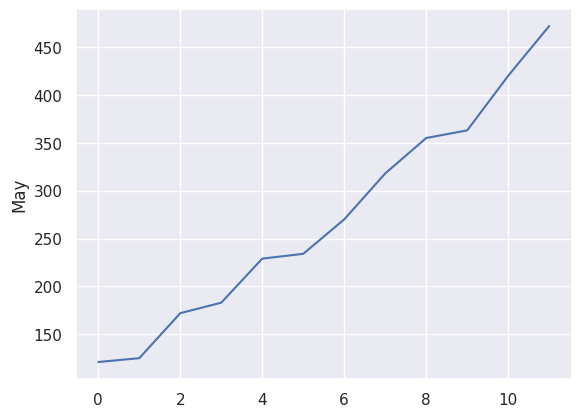

In [5]:
sns.lineplot(data=flights_wide["May"])

<Axes: >

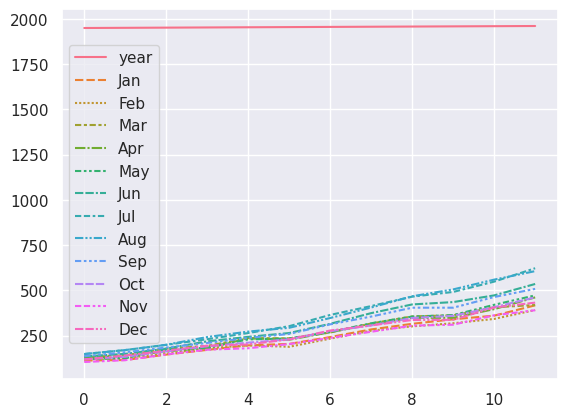

In [6]:
sns.lineplot(data=flights_wide)

<Axes: xlabel='year', ylabel='passengers'>

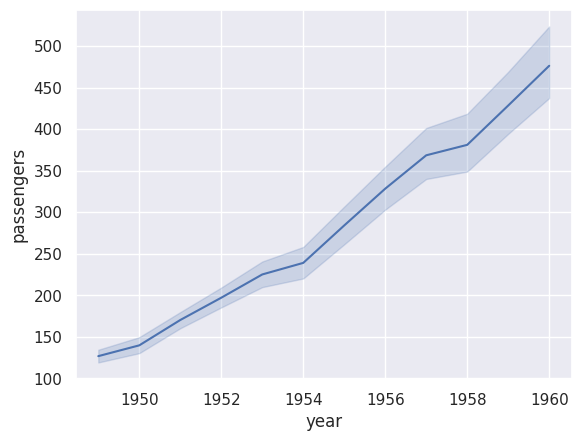

In [7]:
sns.lineplot(data=flights, x="year", y="passengers")

/home/marcogorelli/seaborn-dev/seaborn/_oldcore.py:1064: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


<Axes: xlabel='year', ylabel='passengers'>

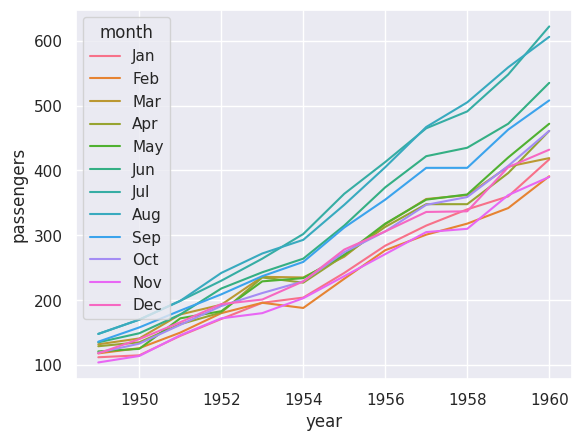

In [8]:
sns.lineplot(data=flights, x="year", y="passengers", hue="month")

/home/marcogorelli/seaborn-dev/seaborn/_oldcore.py:1064: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


<Axes: xlabel='year', ylabel='passengers'>

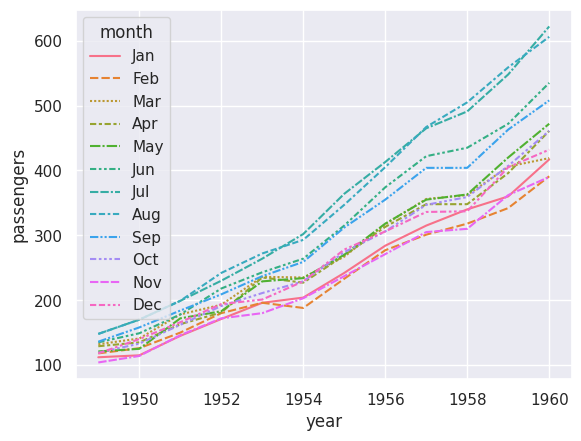

In [9]:
sns.lineplot(data=flights, x="year", y="passengers", hue="month", style="month")

<Axes: xlabel='passengers', ylabel='year'>

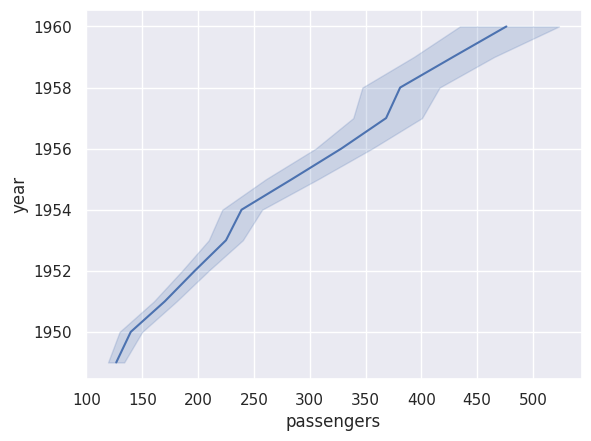

In [10]:
sns.lineplot(data=flights, x="passengers", y="year", orient="y")

In [11]:
fmri = sns.load_dataset("fmri")
fmri.head()

subject,timepoint,event,region,signal
str,i64,str,str,f64
"""s13""",18,"""stim""","""parietal""",-0.017552
"""s5""",14,"""stim""","""parietal""",-0.080883
"""s12""",18,"""stim""","""parietal""",-0.081033
"""s11""",18,"""stim""","""parietal""",-0.046134
"""s10""",18,"""stim""","""parietal""",-0.03797


<Axes: xlabel='timepoint', ylabel='signal'>

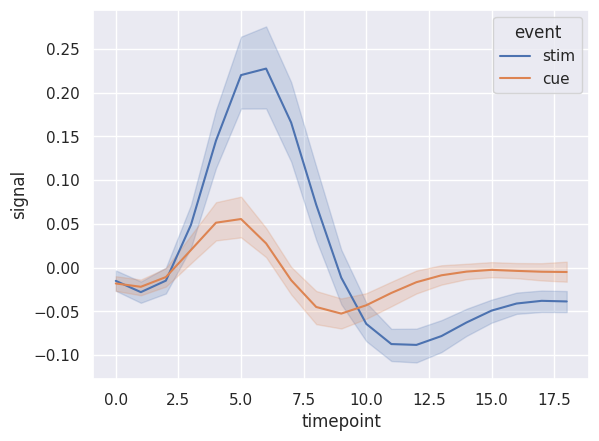

In [12]:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event")

<Axes: xlabel='timepoint', ylabel='signal'>

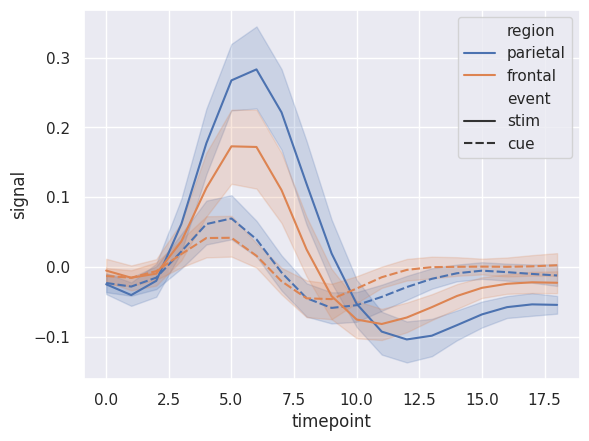

In [13]:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="region", style="event")

<Axes: xlabel='timepoint', ylabel='signal'>

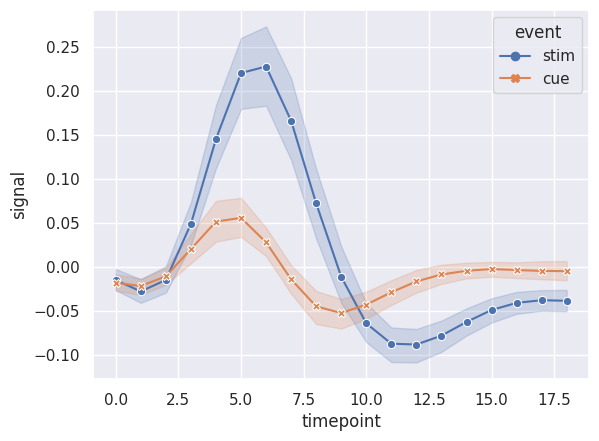

In [14]:
sns.lineplot(
    data=fmri,
    x="timepoint", y="signal", hue="event", style="event",
    markers=True, dashes=False
)

<Axes: xlabel='timepoint', ylabel='signal'>

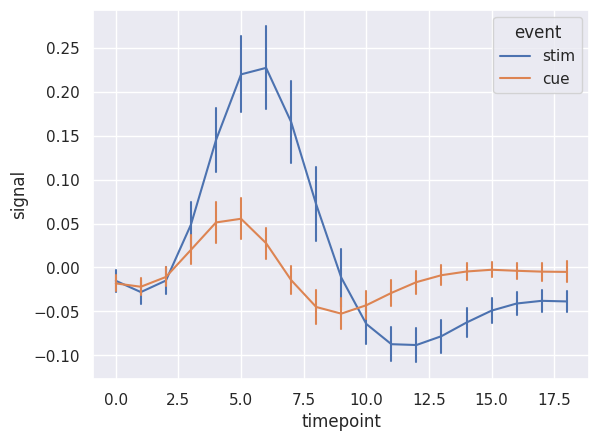

In [15]:
sns.lineplot(
    data=fmri, x="timepoint", y="signal", hue="event", err_style="bars", errorbar=("se", 2),
)

<Axes: xlabel='timepoint', ylabel='signal'>

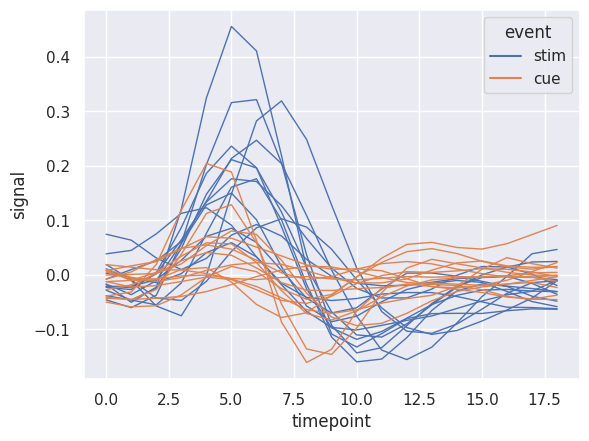

In [16]:
sns.lineplot(
    data=fmri.filter(pl.col("region") == 'frontal'),
    x="timepoint", y="signal", hue="event", units="subject",
    estimator=None, lw=1,
)

In [17]:
dots = sns.load_dataset("dots").filter(pl.col("align") == 'dots')
dots.head()

align,choice,time,coherence,firing_rate
str,str,i64,f64,f64
"""dots""","""T1""",-80,0.0,33.189967
"""dots""","""T1""",-80,3.2,31.691726
"""dots""","""T1""",-80,6.4,34.27984
"""dots""","""T1""",-80,12.8,32.631874
"""dots""","""T1""",-80,25.6,35.060487


<Axes: xlabel='time', ylabel='firing_rate'>

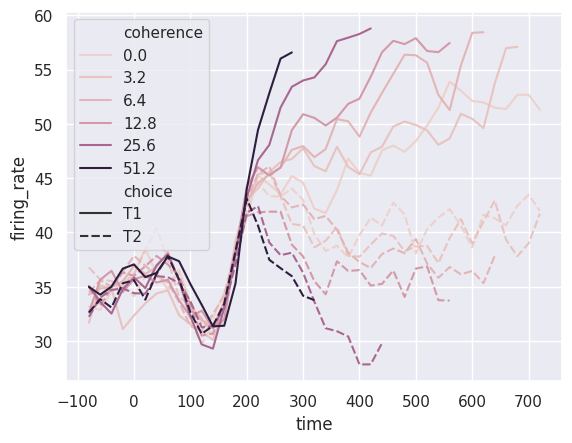

In [18]:
sns.lineplot(
    data=dots, x="time", y="firing_rate", hue="coherence", style="choice",
)

<Axes: xlabel='time', ylabel='firing_rate'>

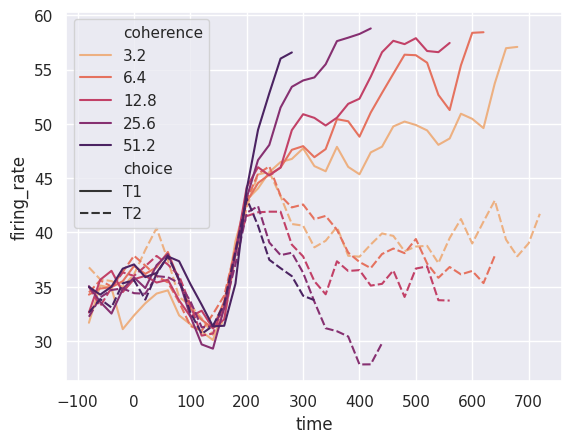

In [19]:
sns.lineplot(
    data=dots.filter(pl.col("coherence") > 0),
    x="time", y="firing_rate", hue="coherence", style="choice",
     palette="flare", hue_norm=mpl.colors.LogNorm(),
)

<Axes: xlabel='time', ylabel='firing_rate'>

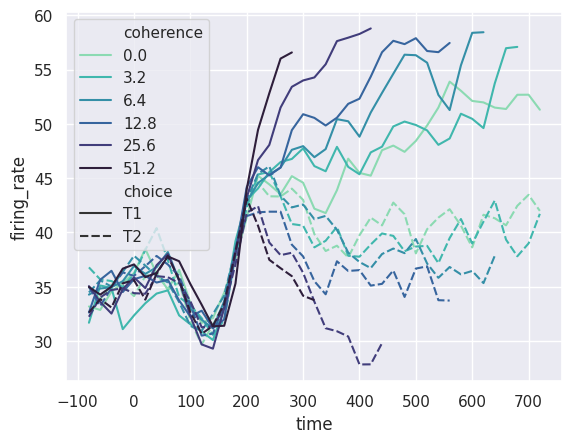

In [20]:
palette = sns.color_palette("mako_r", 6)
sns.lineplot(
    data=dots, x="time", y="firing_rate",
    hue="coherence", style="choice",
    palette=palette
)

<Axes: xlabel='time', ylabel='firing_rate'>

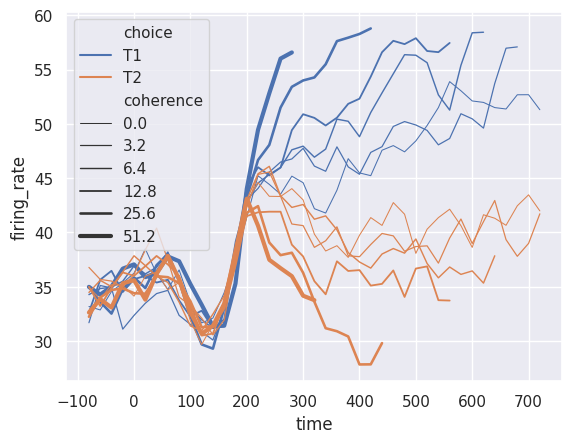

In [21]:
sns.lineplot(
    data=dots, x="time", y="firing_rate",
    size="coherence", hue="choice",
    legend="full"
)

<Axes: xlabel='time', ylabel='firing_rate'>

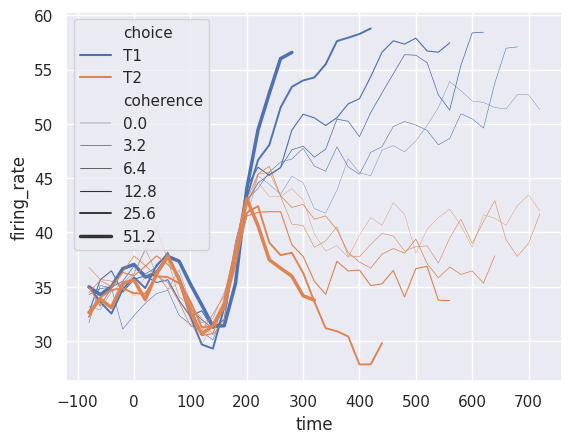

In [22]:
sns.lineplot(
    data=dots, x="time", y="firing_rate",
    size="coherence", hue="choice",
    sizes=(.25, 2.5)
)

<Axes: >

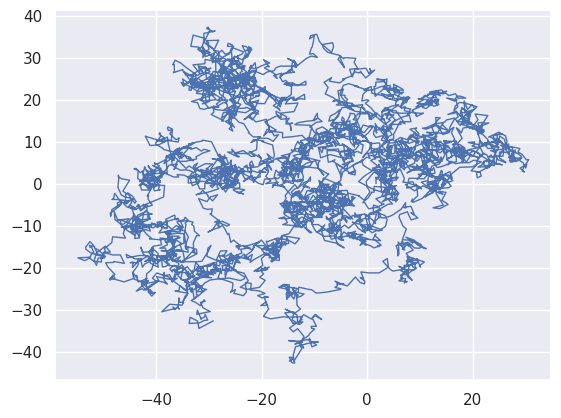

In [23]:
x, y = np.random.normal(size=(2, 5000)).cumsum(axis=1)
sns.lineplot(x=x, y=y, sort=False, lw=1)

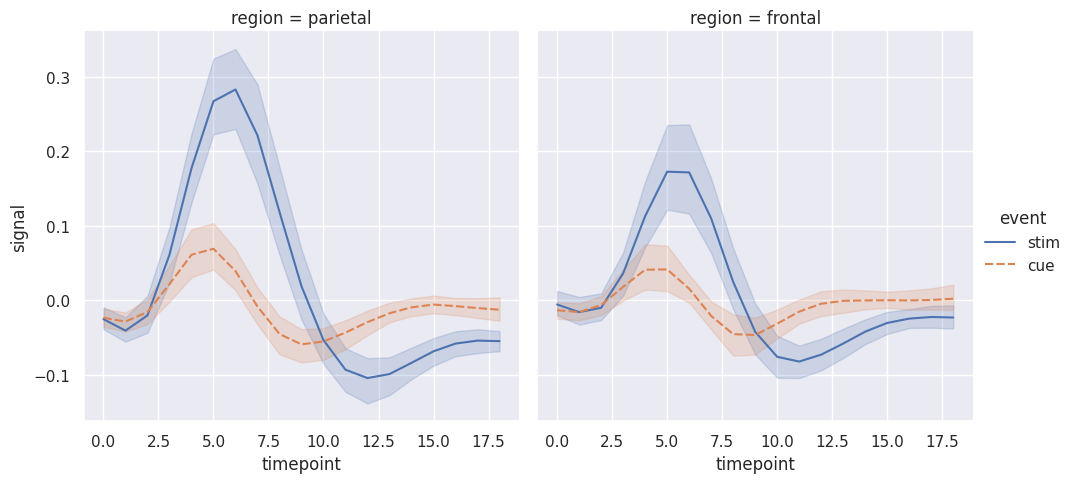

In [24]:
sns.relplot(
    data=fmri, x="timepoint", y="signal",
    col="region", hue="event", style="event",
    kind="line"
)